In [ ]:
#This is done once. For the rest we will be loading data from a local directory
#connect to the API and dowload the data

file="http://search.worldbank.org/api/projects/all.xls"

df=pd.read_excel(file, sheet_name="World Bank Projects", skiprows=2)

#save the data locally

df.to_csv("WB_projects.csv", index=False)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#read the data from local directory
projects_df=pd.read_csv("WB_projects.csv")
#look at the dimension of the data
print(projects_df.shape)
#look at the top 5 rows
projects_df.head(5)

(21443, 26)


,id,regionname,countryname,projectstatusdisplay,project_name,pdo,impagency,cons_serv_reqd_ind,url,boardapprovaldate,...,grantamt,borrower,lendinginstr,envassesmentcategorycode,esrc_ovrl_risk_rate,sector1,sector2,sector3,theme1,theme2
0,P252350,Africa East,Republic of Rwanda,Active,Rwanda Priority Skills for Growth (PSG),The Program Development Objective is to expand...,Ministry Of Education,NaN,http://projects.worldbank.org/P252350/null?lan...,2017-07-05T00:00:00Z,...,0.0,Ministry of Finance and Economic Planning,Program-for-Results Financing,NaN,NaN,Public Administration - Education,Tertiary Education,Workforce Development and Vocational Education,Education for the knowledge economy,NaN
1,P252338,East Asia and Pacific,Democratic Republic of Timor-Leste,Active,Road Climate Resilience Project Second Additio...,The project will deliver sustainable climate r...,"Ministry of Public Works, Transport, and Commu...",NaN,http://projects.worldbank.org/P252338/null?lan...,2017-04-27T00:00:00Z,...,0.0,Ministry of Finance,Investment Project Financing,B,NaN,Rural and Inter-Urban Roads,Public Administration - Transportation,NaN,NaN,NaN
2,P252337,Africa East,Republic of Kenya,Dropped,Kenya Devolution and Service Delivery,To improve citizen and government access to co...,Kenya National Bureau of Statistics,NaN,http://projects.worldbank.org/P252337/null?lan...,NaN,...,340000.0,Kenya National Bureau of Statistics,Investment Project Financing,C,NaN,NaN,NaN,NaN,"Public expenditure, financial management and p...",Decentralization
3,P178935,Middle East and North Africa,Republic of Iraq,Pipeline,Iraq Integrated Persistent Organic Pollutants ...,Improve the management and safe disposal of ta...,Ministry of Environment,TBD,http://projects.worldbank.org/P178935/null?lan...,NaN,...,13490000.0,Ministry of Finance,Investment Project Financing,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,P178914,Africa East,Republic of Malawi,Pipeline,Emergency Power Restoration Project,NaN,NaN,NaN,http://projects.worldbank.org/P178914/null?lan...,NaN,...,0.0,NaN,Investment Project Financing,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#look at the levels of projects status
projects_df.projectstatusdisplay.unique()

array(['Active', 'Dropped', 'Pipeline', nan, 'Closed'], dtype=object)

In [3]:
#Look at the data type and variables names

projects_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21443 entries, 0 to 21442
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        21443 non-null  object 
 1   regionname                21440 non-null  object 
 2   countryname               21440 non-null  object 
 3   projectstatusdisplay      21439 non-null  object 
 4   project_name              21442 non-null  object 
 5   pdo                       11479 non-null  object 
 6   impagency                 6536 non-null   object 
 7   cons_serv_reqd_ind        1435 non-null   object 
 8   url                       21442 non-null  object 
 9   boardapprovaldate         18626 non-null  object 
 10  closingdate               16477 non-null  object 
 11  projectfinancialtype      12885 non-null  object 
 12  curr_project_cost         21295 non-null  float64
 13  curr_ibrd_commitment      21442 non-null  float64
 14  curr_i

In [12]:
#create a copy of the dataset for further manipilations
projects_clean=projects_df.copy()
projects_clean.head()

,id,regionname,countryname,projectstatusdisplay,project_name,pdo,impagency,cons_serv_reqd_ind,url,boardapprovaldate,...,grantamt,borrower,lendinginstr,envassesmentcategorycode,esrc_ovrl_risk_rate,sector1,sector2,sector3,theme1,theme2
0,P252350,Africa East,Republic of Rwanda,Active,Rwanda Priority Skills for Growth (PSG),The Program Development Objective is to expand...,Ministry Of Education,NaN,http://projects.worldbank.org/P252350/null?lan...,2017-07-05T00:00:00Z,...,0.0,Ministry of Finance and Economic Planning,Program-for-Results Financing,NaN,NaN,Public Administration - Education,Tertiary Education,Workforce Development and Vocational Education,Education for the knowledge economy,NaN
1,P252338,East Asia and Pacific,Democratic Republic of Timor-Leste,Active,Road Climate Resilience Project Second Additio...,The project will deliver sustainable climate r...,"Ministry of Public Works, Transport, and Commu...",NaN,http://projects.worldbank.org/P252338/null?lan...,2017-04-27T00:00:00Z,...,0.0,Ministry of Finance,Investment Project Financing,B,NaN,Rural and Inter-Urban Roads,Public Administration - Transportation,NaN,NaN,NaN
2,P252337,Africa East,Republic of Kenya,Dropped,Kenya Devolution and Service Delivery,To improve citizen and government access to co...,Kenya National Bureau of Statistics,NaN,http://projects.worldbank.org/P252337/null?lan...,NaN,...,340000.0,Kenya National Bureau of Statistics,Investment Project Financing,C,NaN,NaN,NaN,NaN,"Public expenditure, financial management and p...",Decentralization
3,P178935,Middle East and North Africa,Republic of Iraq,Pipeline,Iraq Integrated Persistent Organic Pollutants ...,Improve the management and safe disposal of ta...,Ministry of Environment,TBD,http://projects.worldbank.org/P178935/null?lan...,NaN,...,13490000.0,Ministry of Finance,Investment Project Financing,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,P178914,Africa East,Republic of Malawi,Pipeline,Emergency Power Restoration Project,NaN,NaN,NaN,http://projects.worldbank.org/P178914/null?lan...,NaN,...,0.0,NaN,Investment Project Financing,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
#remove dropped projects
projects_clean=projects_clean[projects_clean['projectstatusdisplay']!='Dropped']
projects_clean.projectstatusdisplay.unique()

array(['Active', 'Pipeline', nan, 'Closed'], dtype=object)

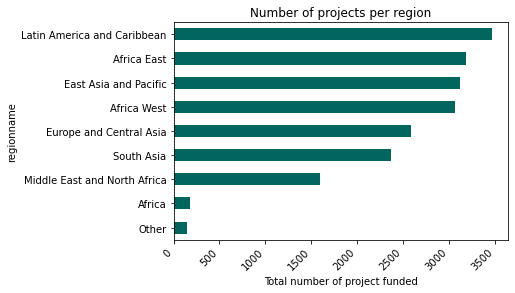

In [18]:
#group data by region
plt.figure
projects_clean_regions=projects_clean.pivot_table(values="id", index='regionname',aggfunc=np.count_nonzero)
projects_clean_regions.sort_values(by="id").plot(legend=None,
 y="id",color="#01665e",kind="barh")
plt.title("Number of projects per region")
plt.xticks(rotation=45, ha="right")
plt.xlabel("Total number of project funded");

In [19]:
projects_clean['regionname'].unique()

array(['Africa East', 'East Asia and Pacific',
       'Middle East and North Africa', 'Europe and Central Asia',
       'Africa West', 'Latin America and Caribbean', 'South Asia',
       'Africa', 'Other', nan], dtype=object)

In [21]:
#Let's combine all project implemented at the African continent

projects_clean['regionname'] = projects_clean['regionname'].replace(['Africa East', 'Africa West',],'Africa')
print(projects_clean.shape)
print(projects_clean['regionname'].unique())

(19736, 26)
['Africa' 'East Asia and Pacific' 'Middle East and North Africa'
 'Europe and Central Asia' 'Latin America and Caribbean' 'South Asia'
 'Other' nan]


<Figure size 720x648 with 0 Axes>

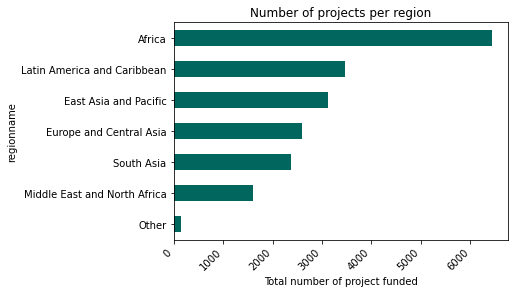

In [26]:
#group data by harmonized regions 
plt.figure(figsize=(10, 9))
projects_clean_regions=projects_clean.pivot_table(values="id", index='regionname',aggfunc=np.count_nonzero)
projects_clean_regions.sort_values(by="id").plot(legend=None,
 y="id",color="#01665e",kind="barh")
plt.title("Number of projects per region")
plt.xticks(rotation=45, ha="right")
plt.xlabel("Total number of project funded");